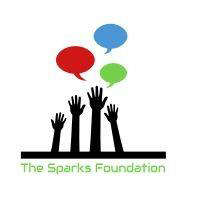

# Task 5 To explore Business Analytics


**Perform Exploratory Data Analysis on the provided
Sample Super store dataset**

**Importing the required libaries**

In [17]:
import pandas as pdt 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

**Datasets**

In [2]:
store_data=pd.read_csv('SampleSuperstore.csv')
store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Shape of the Dataset**

In [3]:
store_data.shape

(9994, 13)

**Checking if the data contains any null value**

In [4]:
store_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

   **Finding the number of uniques values in each category**

In [5]:
store_data.nunique(axis=0)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Dropping duplicate values if any**

In [6]:
store_data.drop_duplicates(inplace=True)

In [7]:
store_data.shape

(9977, 13)

# Exploratory Data Analysis

**Checking all the statistics of the data**

In [8]:
store_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


**More information about the data**

In [9]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


**We see which features are more related to the profit**

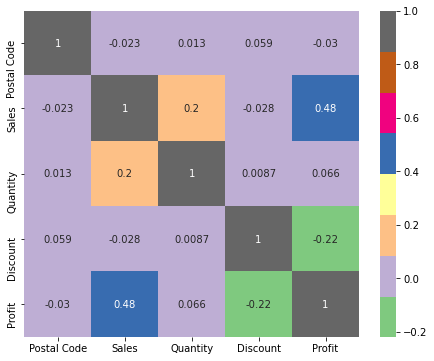

In [10]:
correla=store_data.corr()
plt.figure(figsize=(7.5,6))
sns.heatmap(correla,annot=True,cmap='Accent')

**Visualization of Data**

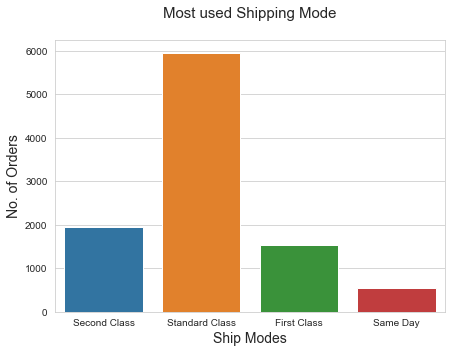

In [104]:
plt.figure(figsize=(7,5))
plt.title('Most used Shipping Mode\n',size=15)
sns.countplot(store_data['Ship Mode'])
plt.xlabel('Ship Modes',size=14)
plt.ylabel('No. of Orders',size=14)
plt.show()

  **We see the Standard class shipping Mode is used the most**

# **Categories and Sub-Categories which are most ordered**

          Category  Quantity
0        Furniture      8020
1  Office Supplies     22861
2       Technology      6939


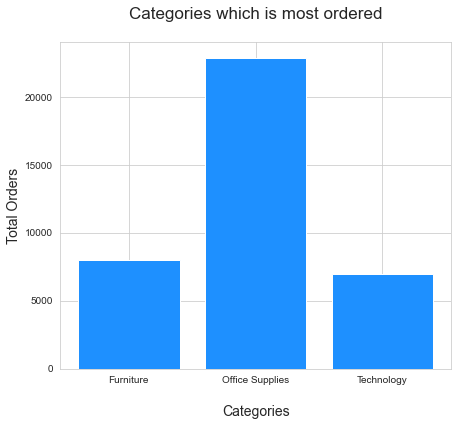

In [167]:
total_order=store_data.groupby('Category')['Quantity'].sum().reset_index()
print(total_order)
plt.figure(figsize=(7,6))
plt.title('Categories which is most ordered\n',size=17)
plt.bar(total_order['Category'],total_order['Quantity'],color='dodgerblue')
plt.xlabel('\nCategories',size=14)
plt.ylabel('Total Orders',size=14)
plt.show()

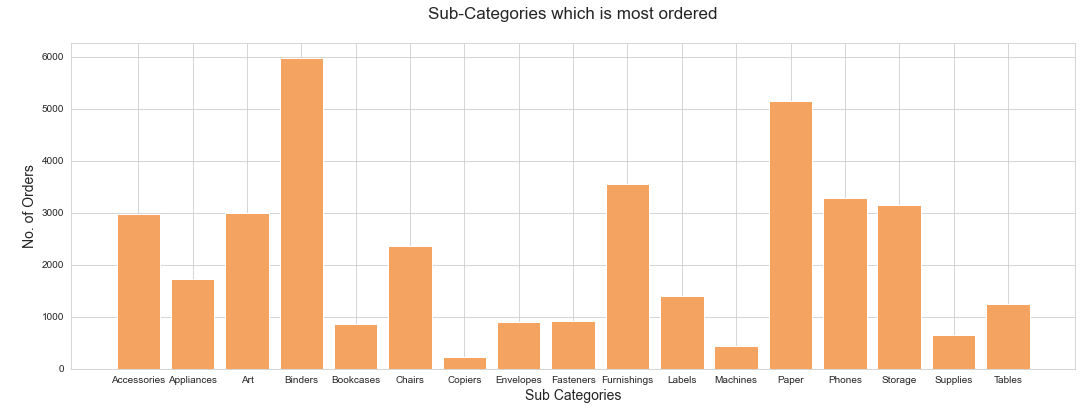

In [168]:
total_order=store_data.groupby('Sub-Category')['Quantity'].sum().reset_index()
plt.figure(figsize=(18,6))
plt.bar(total_order['Sub-Category'],total_order['Quantity'],color='sandybrown')
plt.title('Sub-Categories which is most ordered\n',size=17)
plt.xlabel('Sub Categories',size=14)
plt.ylabel('\nNo. of Orders',size=14)
plt.show()

**Quantities ordered by each Segment**

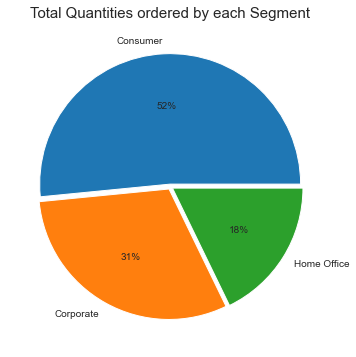

In [48]:
segment=store_data.groupby('Segment')['Quantity'].sum().reset_index()
plt.figure(figsize=(7,6))
plt.title('Total Quantities ordered by each Segment',size=15)
plt.pie(segment['Quantity'],autopct='%1.f%%',explode=(0.02,0.02,0.02),labels=store_data['Segment'].unique())
plt.show()

# Region with highest sales 

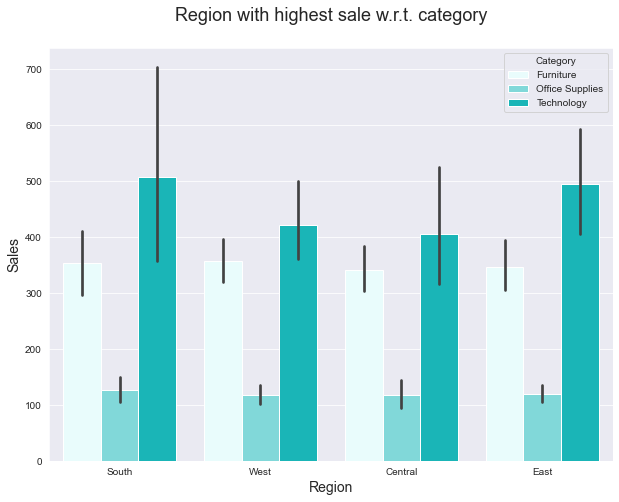

In [58]:
plt.figure(figsize=(10.1,7.6))
plt.title('Region with highest sale w.r.t. category\n',size=18)
plt.xlabel('Region',size=14)
plt.ylabel('Sales',size=14)
sns.set_style('darkgrid')
sns.barplot(store_data['Region'],store_data['Sales'],hue=store_data['Category'],color='darkturquoise')
plt.show()

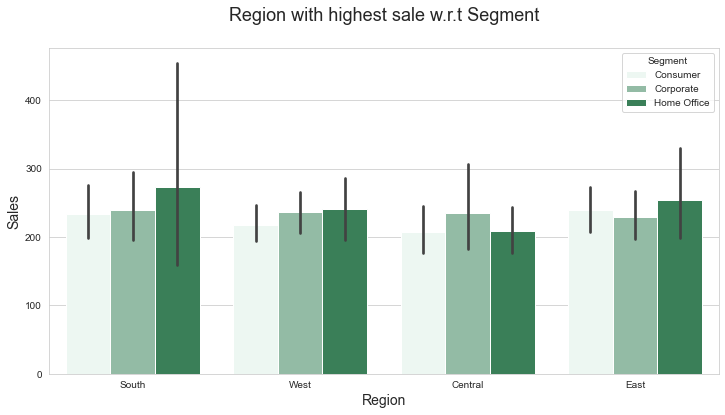

In [164]:
plt.figure(figsize=(12,6))
plt.title('Region with highest sale w.r.t Segment\n',size=18)
sns.barplot(x='Region',y='Sales',hue='Segment',data=store_data,color='seagreen')
plt.xlabel('Region',size=14)
plt.ylabel('Sales',size=14)
plt.show()

# **State with most and least Sale**


In [135]:
states=store_data.groupby('State')['Sales'].sum().reset_index()

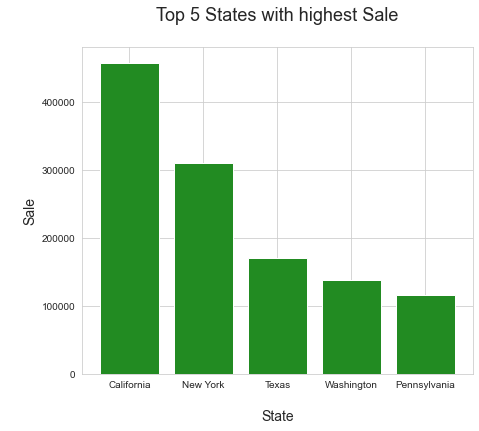

In [136]:
top_5=states.sort_values('Sales',ascending=False).head()
plt.figure(figsize=(7,6))
plt.title('Top 5 States with highest Sale\n',size=18)
plt.bar(top_5['State'],top_5['Sales'],color='forestgreen')
plt.xlabel('\nState',size=14)
plt.ylabel('\nSale',size=14)
plt.show()

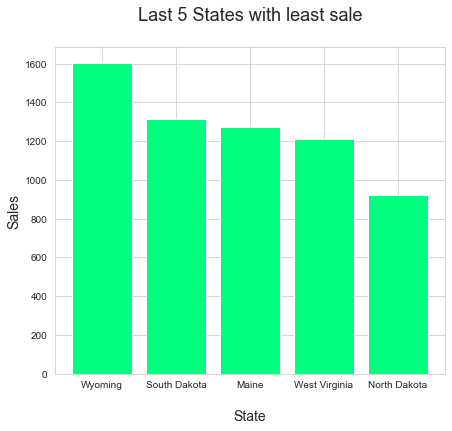

In [141]:
last_5=states.sort_values('Sales',ascending=False).tail()
plt.figure(figsize=(7,6))
plt.title('Last 5 States with least sale\n',size=18)
plt.bar(last_5['State'],last_5['Sales'],color='springgreen')
plt.xlabel('\nState',size=14)
plt.ylabel('Sales',size=14)
plt.show()

  # Cities with most and least Sales

In [143]:
cities=store_data.groupby('City')['Sales'].sum().reset_index()

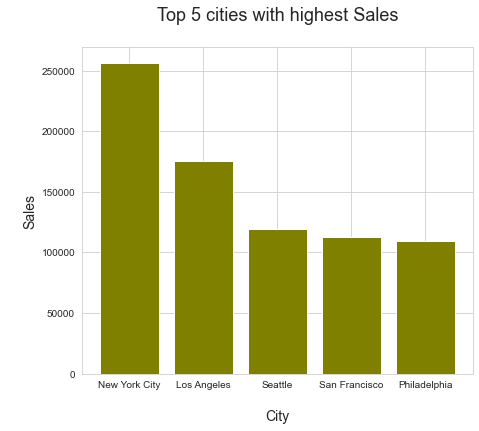

In [144]:
top_5=cities.sort_values('Sales',ascending=False).head()
plt.figure(figsize=(7,6))
plt.title('Top 5 cities with highest Sales\n',size=18)
plt.bar(top_5['City'],top_5['Sales'],color='olive')
plt.xlabel('\nCity',size=14)
plt.ylabel('\nSales',size=14)
plt.show()

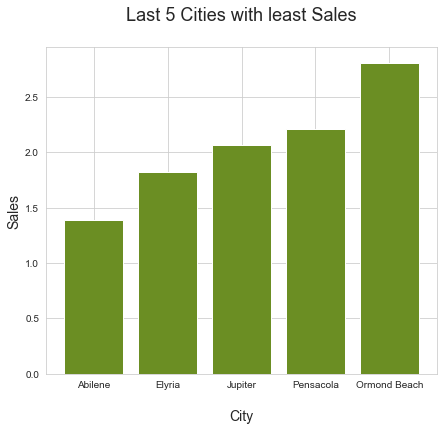

In [147]:
last_5=cities.sort_values('Sales',ascending=True).head()
plt.figure(figsize=(7,6))
plt.title('Last 5 Cities with least Sales\n',size=18)
plt.bar(last_5['City'],last_5['Sales'],color='olivedrab')
plt.xlabel('\nCity',size=14)
plt.ylabel('Sales',size=14)
plt.show()

# States with most and least Profit 

In [152]:
states=store_data.groupby('State')['Profit'].sum().reset_index()

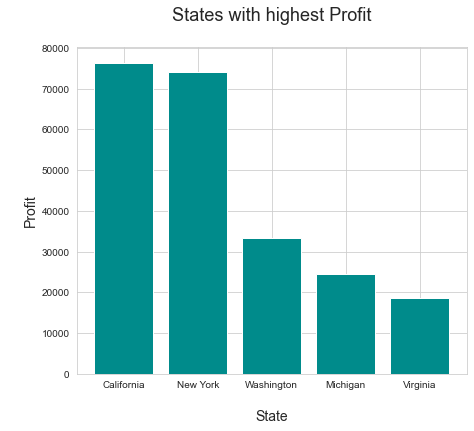

In [153]:
top_5=states.sort_values('Profit',ascending=False).head()
plt.figure(figsize=(7,6))
plt.title('States with highest Profit\n',size=18)
plt.bar(top_5['State'],top_5['Profit'],color='darkcyan')
plt.xlabel('\nState',size=14)
plt.ylabel('\nProfit',size=14)
plt.show()

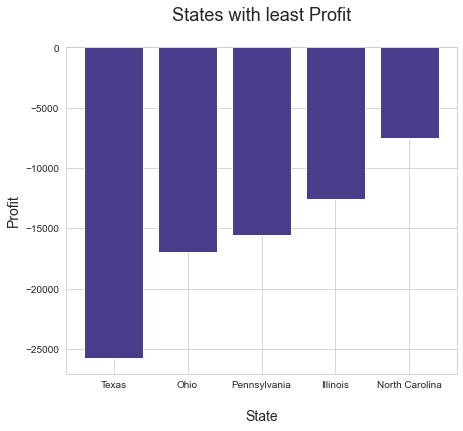

In [154]:
last_5=states.sort_values('Profit',ascending=True).head()
plt.figure(figsize=(7,6))
plt.title('States with least Profit\n',size=18)
plt.bar(last_5['State'],last_5['Profit'],color='darkslateblue')
plt.xlabel('\nState',size=14)
plt.ylabel('Profit',size=14)
plt.show()

# Cities with most and least Profit

In [149]:
cities=store_data.groupby('City')['Profit'].sum().reset_index()

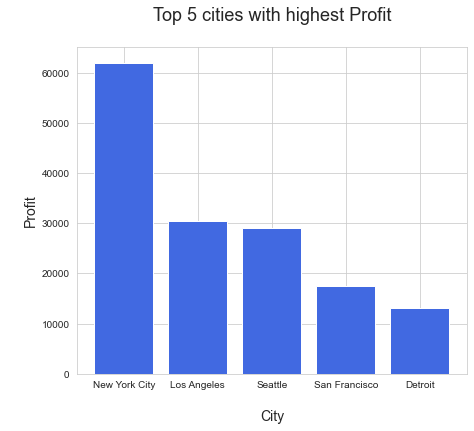

In [150]:
top_5=cities.sort_values('Profit',ascending=False).head()
plt.figure(figsize=(7,6))
plt.title('Top 5 cities with highest Profit\n',size=18)
plt.bar(top_5['City'],top_5['Profit'],color='royalblue')
plt.xlabel('\nCity',size=14)
plt.ylabel('\nProfit',size=14)
plt.show()

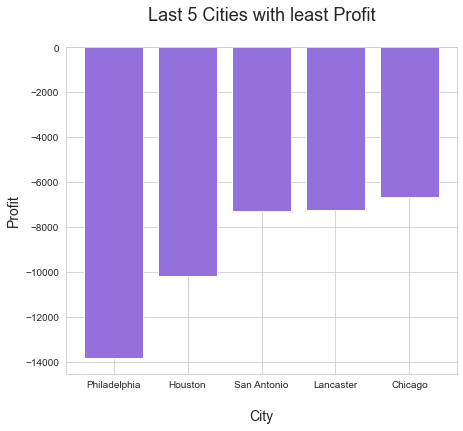

In [155]:
last_5=cities.sort_values('Profit',ascending=True).head()
plt.figure(figsize=(7,6))
plt.title('Last 5 Cities with least Profit\n',size=18)
plt.bar(last_5['City'],last_5['Profit'],color='mediumpurple')
plt.xlabel('\nCity',size=14)
plt.ylabel('Profit',size=14)
plt.show()

# Categories with most Sales, Profits and Discounts




In [158]:
categories=store_data.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
categories

,Category,Sales
2,Technology,836154.0330
0,Furniture,741306.3133
1,Office Supplies,718735.2440


In [159]:
categories=store_data.groupby('Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
categories

,Category,Profit
2,Technology,145454.9481
1,Office Supplies,122364.6608
0,Furniture,18421.8137


In [169]:
categories=store_data.groupby('Category')['Discount'].sum().reset_index().sort_values(by='Discount',ascending=False)
categories

,Category,Discount
1,Office Supplies,946.20
0,Furniture,368.59
2,Technology,244.40


**We can conclude that the Technology catgory has the most profit and sales. But though Furniture has more sales than Office Supplies, the later brings more Profit although it gives most Discount.**

# Products with most Sales and Profit

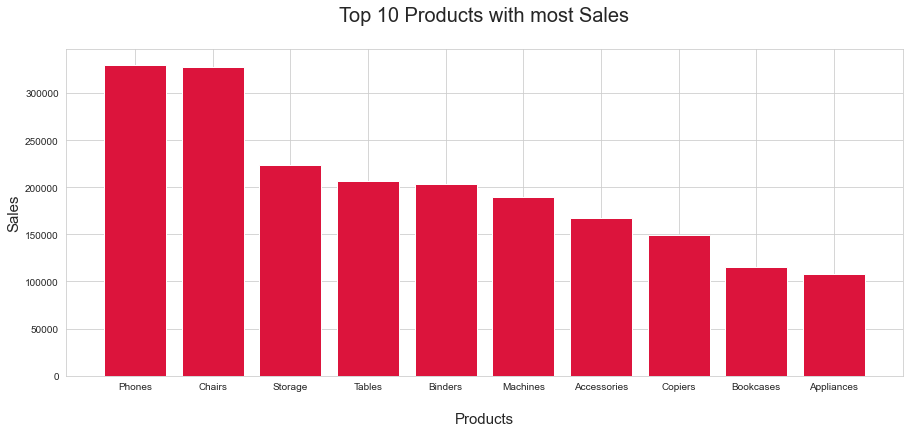

In [162]:
subcategories=store_data.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10)
plt.figure(figsize=(15,6))
plt.title('Top 10 Products with most Sales\n',size=20)
plt.bar(subcategories['Sub-Category'],subcategories['Sales'],color='crimson')
plt.xlabel('\nProducts',size=15)
plt.ylabel('Sales',size=15)
plt.show()

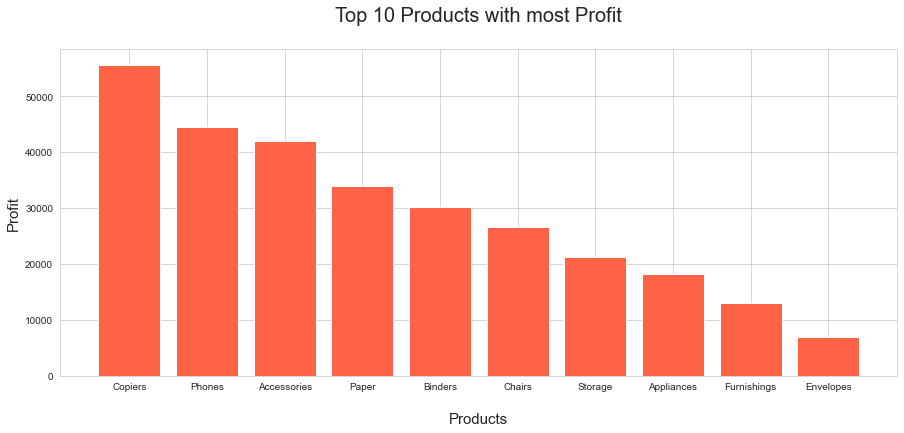

In [163]:
subcategories=store_data.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False).head(10)
plt.figure(figsize=(15,6))
plt.title('Top 10 Products with most Profit\n',size=20)
plt.bar(subcategories['Sub-Category'],subcategories['Profit'],color='tomato')
plt.xlabel('\nProducts',size=15)
plt.ylabel('Profit',size=15)
plt.show()

**We observe that though Phones has highes sales but it does not bring highest Profit but Copiers does though it is not among Top 5 in terms of Sales**

# Made By Bishal Paul